<a href="https://colab.research.google.com/github/Davidlawrence1234/beginner-project/blob/main/Copy_of_Ensembling_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df = pd.read_csv("/content/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
round(df.isna().sum() / df.shape[0] * 100,2)

,0
Country,0.00
Year,0.00
Status,0.00
Life expectancy,0.34
Adult Mortality,0.34
infant deaths,0.00
Alcohol,6.60
percentage expenditure,0.00
Hepatitis B,18.82
Measles,0.00


In [ ]:
data = df.copy()

In [ ]:
def outliers(col):
  q1, q3 = data[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower = q1 - iqr * 1.5
  upper = q3 + iqr * 1.5
  return lower, upper

In [ ]:
for col in data.select_dtypes(include=["number"]).columns.tolist():
  lower, upper = outliers(col)
  data[col] = np.clip(data[col], lower, upper)

In [ ]:
data.shape

(2938, 22)

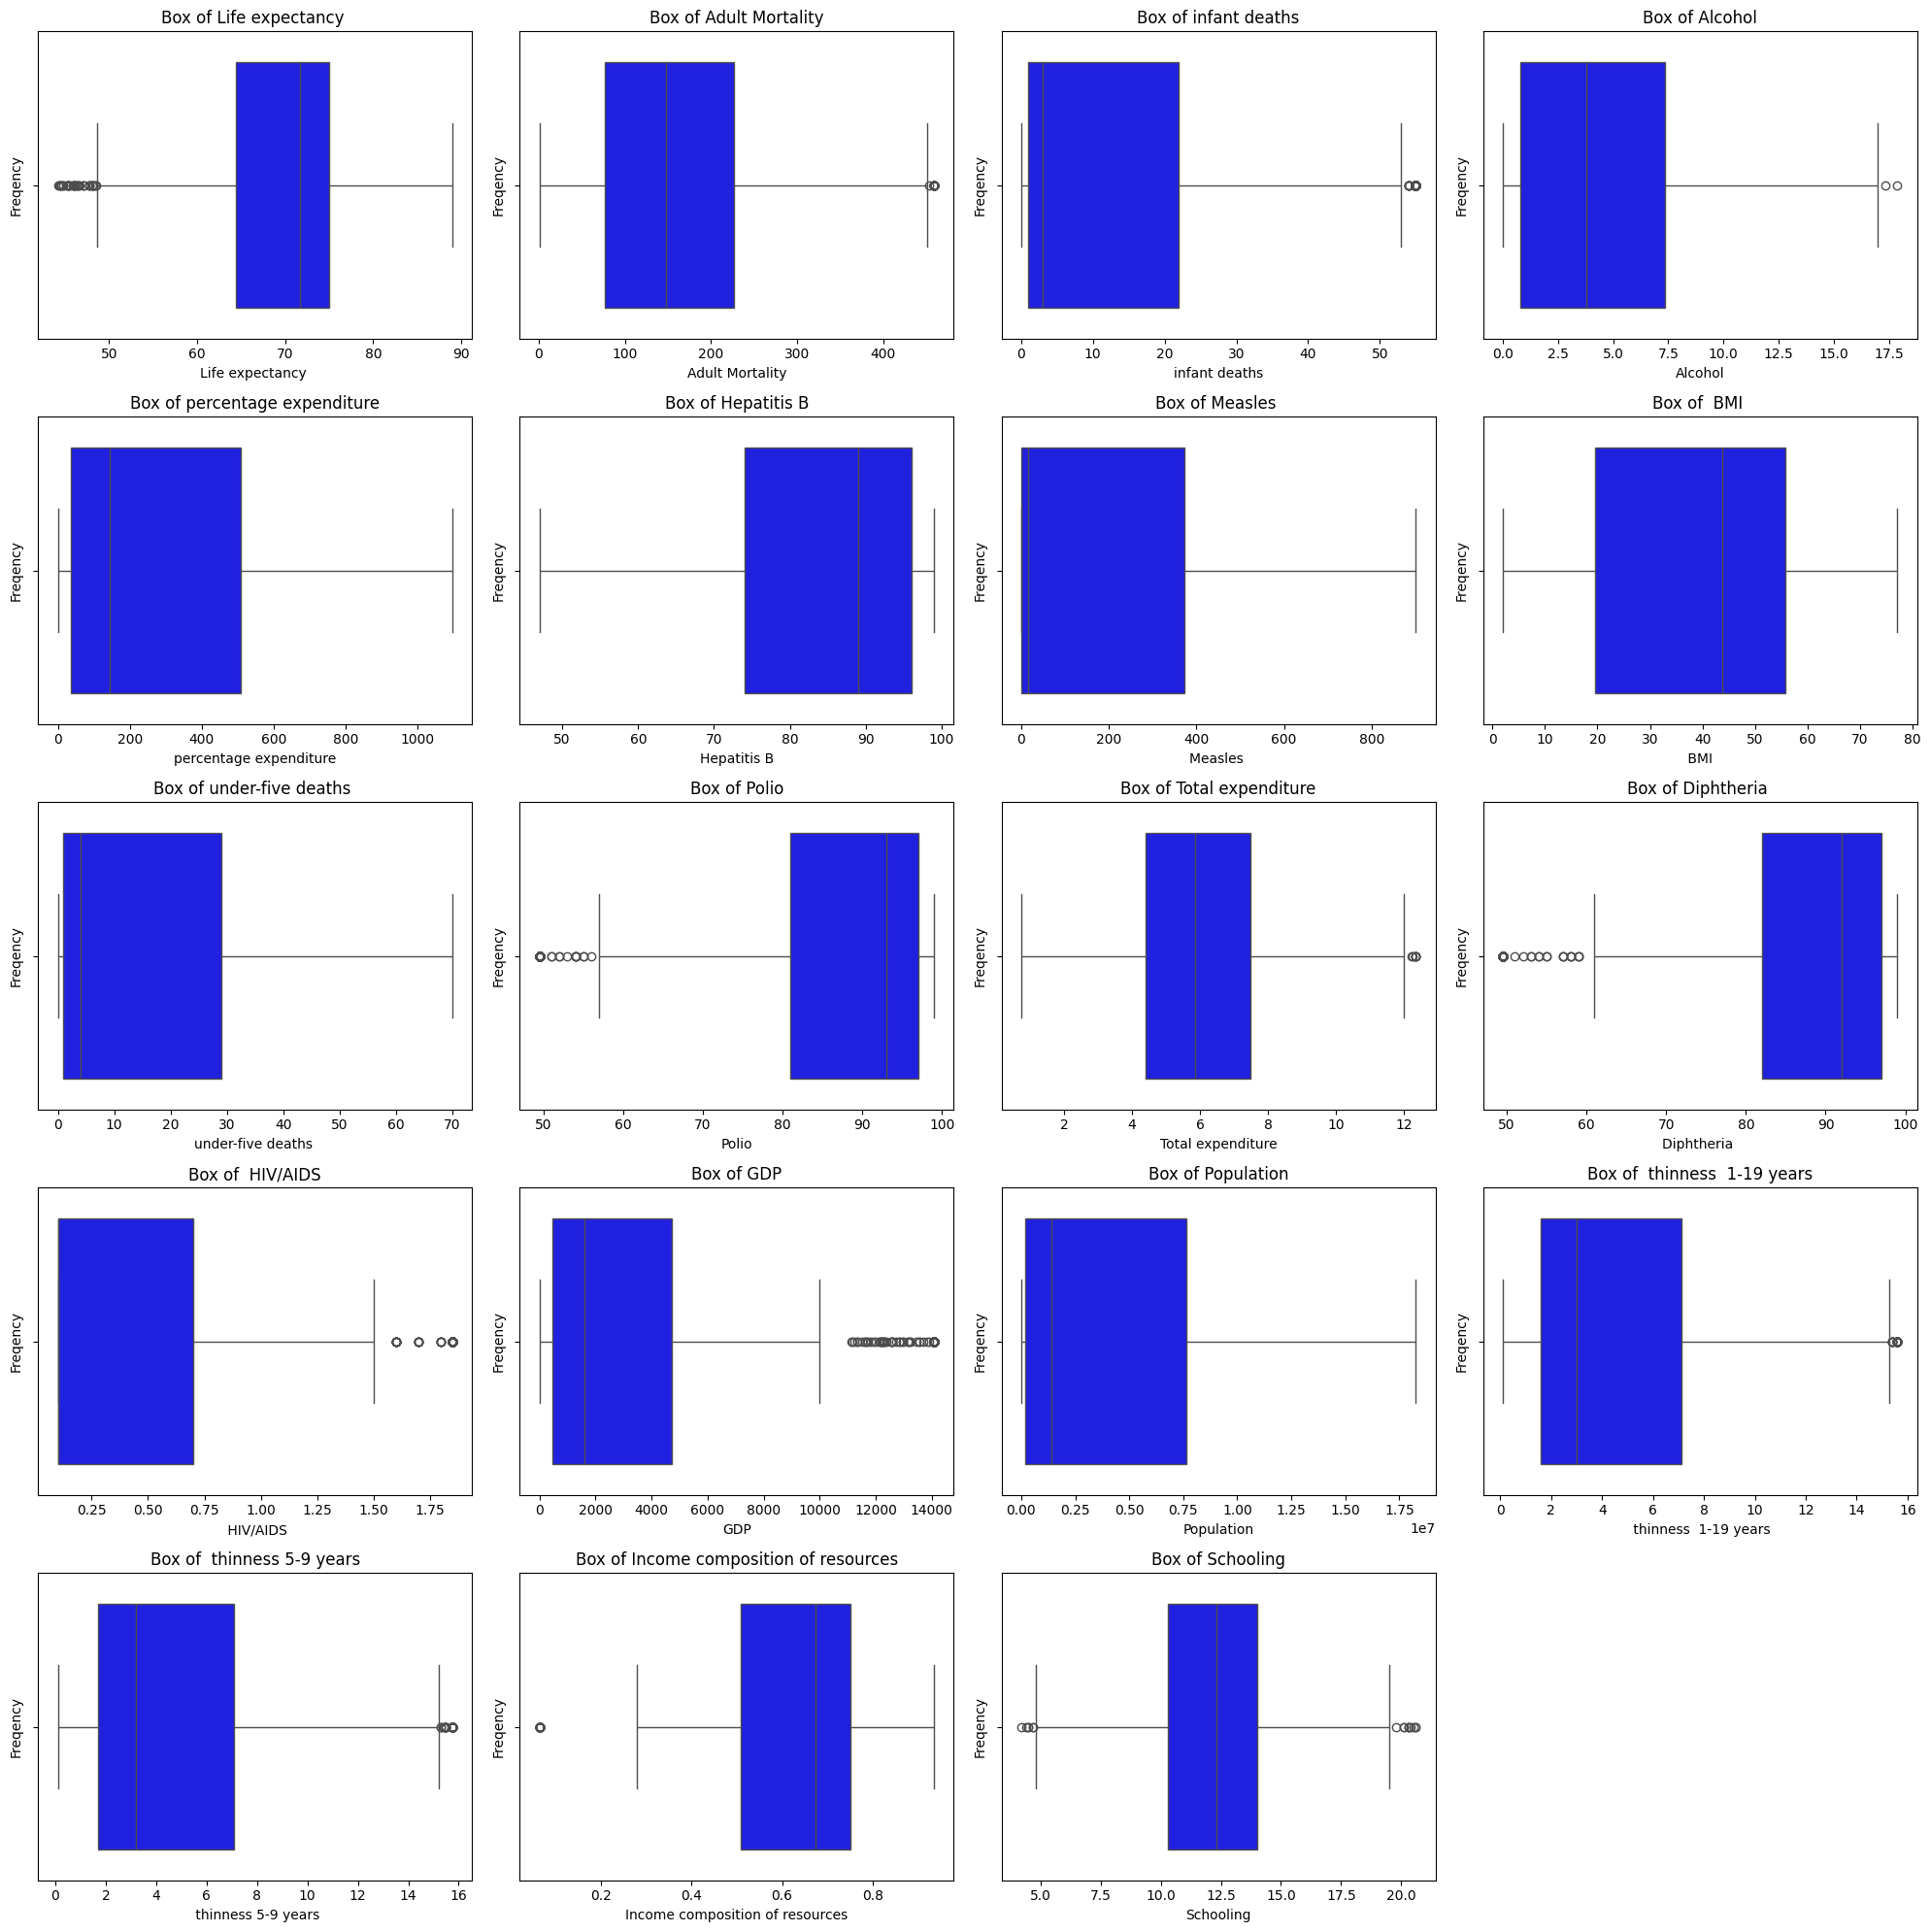

In [ ]:
box(data.drop("Year", axis=1))

In [ ]:
for col in data.select_dtypes(include=['number']).columns.tolist():
  data[col].fillna(data[col].median(), inplace=True)

<ipython-input-76-3445157074>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
status_encoder = LabelEncoder()
country_encoder = LabelEncoder()
data["country"] = country_encoder.fit_transform(data["Country"])
data["status"] = status_encoder.fit_transform(data["Status"])

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=["Life expectancy ", "Year", "Country"]).values
y = data["Life expectancy "].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.Country.value_counts()

In [ ]:
df.Country.unique()

In [ ]:
df.Country.nunique()

In [ ]:
df.Status.value_counts()

In [ ]:
len(df.select_dtypes(include=['number']).columns.tolist())

In [ ]:
def dist(df):

  data = df.replace([np.inf, -np.inf], np.nan).dropna()
  num_cols = len(df.select_dtypes(include=['number']).columns.tolist())
  cols = min(4, num_cols)
  rows = math.ceil(num_cols / cols)

  fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
  axes = np.array(axes).flatten()

  for i, col in enumerate(data.select_dtypes(include=['number']).columns.tolist()):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax, color="Blue", bins=30)

    mean = data[col].mean()
    median = data[col].median()
    mode = data[col].mode()[0]

    ax.axvline(mean, color="red", linestyle='--', label=f"Mean:{mean:.2f}")
    ax.axvline(median, color="green", linestyle='--', label=f"Median:{median:.2f}")
    ax.axvline(mean, color="magenta", linestyle='--', label=f"Mode:{mode:.2f}")

    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Freqency")
    ax.legend()

  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

dist(df)

In [ ]:
df.columns

In [ ]:
def scatter(df):

  data = df.replace([np.inf, -np.inf], np.nan).dropna()
  num_cols = len(df.select_dtypes(include=['number']).columns.tolist())
  cols = min(4, num_cols)
  rows = math.ceil(num_cols / cols)

  fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
  axes = np.array(axes).flatten()

  for i, col in enumerate(data.select_dtypes(include=['number']).columns.tolist()):
    ax = axes[i]
    sns.scatterplot(data=data, x=col, y='Life expectancy ', ax=ax, color="Blue")

    cor = df["Life expectancy "].corr(df[col])

    ax.text(0.05, 0.08, f"Correlation:{cor:.2f}", color="black", transform=ax.transAxes)

    ax.set_title(f"Scatter of {col} and Correlation:{round(cor,1)}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Life Expectancy")

  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

scatter(df.drop("Year", axis=1))

In [ ]:
def box(df):

  data = df.replace([np.inf, -np.inf], np.nan).dropna()
  num_cols = len(df.select_dtypes(include=['number']).columns.tolist())
  cols = min(4, num_cols)
  rows = math.ceil(num_cols / cols)

  fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
  axes = np.array(axes).flatten()

  for i, col in enumerate(data.select_dtypes(include=['number']).columns.tolist()):
    ax = axes[i]
    sns.boxplot(data=data, x=col, ax=ax, color="Blue")

    ax.set_title(f"Box of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Freqency")


  for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

box(df.drop("Year", axis=1))

In [ ]:
round(df.isna().sum() / df.shape[0] * 100,2)

In [ ]:
data = df.copy()

In [ ]:
def outliers(col):
  q1, q3 = data[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower = q1 - iqr * 1.5
  upper = q3 + iqr * 1.5
  return lower, upper

In [ ]:
for col in data.select_dtypes(include=["number"]).columns.tolist():
  lower, upper = outliers(col)
  data[col] = np.clip(data[col], lower, upper)

In [ ]:
data.shape

In [ ]:
box(data.drop("Year", axis=1))

In [ ]:
for col in data.select_dtypes(include=['number']).columns.tolist():
  low, high = data[col].quantile([0.1, 0.9])
  data.loc[(data[col] <= low) | (data[col] >= high), col] = np.nan

In [ ]:
round(data.isna().sum() / data.shape[0] * 100,2)

In [ ]:
for col in data.select_dtypes(include=['number']).columns.tolist():
  data[col].fillna(data[col].median(), inplace=True)

In [ ]:
round(data.isna().sum() / data.shape[0] * 100,2)

In [ ]:
box(df.drop("Year", axis=1))